In [109]:
! pip install pandas openpyxl
! pip install pandas
! pip install matplotlib
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import pandas as pd
import numpy as np
import requests
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [112]:
# LOAD DATA

In [146]:
df = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\City.xlsx')
df1 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Continent.xlsx')
df2 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Country.xlsx')
df3 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Item.xlsx')
df4 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Mode.xlsx')
df5 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Region.xlsx')
df6= pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Transaction.xlsx')
df7 = pd.read_excel(r'c:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Type.xlsx')
df8 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\Updated_Item.xlsx')
df9 = pd.read_excel(r'C:\Users\Ranjitha\OneDrive\Documents\GUVI PROJECTS\MINI PROJECT4\Excel_Files\User.xlsx')

In [151]:
# CHECK BASIC INFO

In [152]:
df.columns

Index(['CityId', 'CityName', 'CountryId'], dtype='object')

In [116]:
df1.columns

Index(['ContinentId', 'Continent'], dtype='object')

In [148]:
df2.columns

Index(['CountryId', 'Country', 'RegionId'], dtype='object')

In [118]:
df3.columns

Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')

In [119]:
df4.columns

Index(['VisitModeId', 'VisitMode'], dtype='object')

In [120]:
df5.columns

Index(['Region', 'RegionId', 'ContinentId'], dtype='object')

In [121]:
df6.columns

Index(['TransactionId', 'UserId', 'VisitYear', 'VisitMonth', 'VisitMode',
       'AttractionId', 'Rating'],
      dtype='object')

In [122]:
df7.columns

Index(['AttractionTypeId', 'AttractionType'], dtype='object')

In [123]:
df8.columns

Index(['AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress'],
      dtype='object')

In [124]:
df9.columns

Index(['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId'], dtype='object')

In [125]:
df.head(2)

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1


In [126]:
df1.head(2)

,ContinentId,Continent
0,0,-
1,1,Africa


In [127]:
df2.head(2)

,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1


In [128]:
df3.head(2)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"


In [129]:
df4.head(2)

,VisitModeId,VisitMode
0,0,-
1,1,Business


In [130]:
df5.head(2)

,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1


In [131]:
df6.head(2)

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5


In [132]:
df7.head(2)

,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets


In [133]:
df8.head(2)

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"


In [134]:
df9.head(2)

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0


In [135]:
# CONCAT THE COLUMNS

In [167]:
combined_df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)
print(combined_df.columns)


Index(['CityId', 'CityName', 'CountryId', 'ContinentId', 'Continent',
       'CountryId', 'Country', 'RegionId', 'AttractionId', 'AttractionCityId',
       'AttractionTypeId', 'Attraction', 'AttractionAddress', 'VisitModeId',
       'VisitMode', 'Region', 'RegionId', 'ContinentId', 'TransactionId',
       'UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'AttractionId',
       'Rating', 'AttractionTypeId', 'AttractionType', 'AttractionId',
       'AttractionCityId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'UserId', 'ContinentId', 'RegionId', 'CountryId',
       'CityId'],
      dtype='object')


In [ ]:
# Merge duplicates
duplicate_groups = {
    "CityId": ['CityId', 'CityId.1'],
    "CountryId": ['CountryId', 'CountryId.1', 'CountryId.2'],
    "ContinentId": ['ContinentId', 'ContinentId.1', 'ContinentId.2'],
    "RegionId": ['RegionId', 'RegionId.1', 'RegionId.2'],
    "AttractionId": ['AttractionId', 'AttractionId.1', 'AttractionId.2'],
    "AttractionTypeId": ['AttractionTypeId', 'AttractionTypeId.1', 'AttractionTypeId.2'],
    "Attraction": ['Attraction', 'Attraction.1', 'Attraction.2'],
    "AttractionAddress": ['AttractionAddress', 'AttractionAddress.1', 'AttractionAddress.2'],
    "UserId": ['UserId', 'UserId.1'],
    "VisitMode": ['VisitMode', 'VisitMode.1'],
}


for new_col, dup_cols in duplicate_groups.items():
    dup_cols = [col for col in dup_cols if col in combined_df.columns]
    if dup_cols:
        combined_df[new_col] = combined_df[dup_cols].bfill(axis=1).iloc[:, 0]


all_dup_cols = [col for group in duplicate_groups.values() for col in group if col in combined_df.columns]
final_columns = list(set(combined_df.columns) - set(all_dup_cols)) + list(duplicate_groups.keys())
combined_df = combined_df[final_columns]

combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]


C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\2504411173.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[new_col] = combined_df[dup_cols].bfill(axis=1).iloc[:, 0]
C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\2504411173.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[new_col] = combined_df[dup_cols].bfill(axis=1).iloc[:, 0]
C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\2504411173.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future ve

In [169]:
combined_df.columns

Index(['Continent', 'AttractionCityId', 'VisitModeId', 'Region',
       'TransactionId', 'VisitMonth', 'Country', 'CityName', 'Rating',
       'VisitYear', 'AttractionType', 'CityId', 'CountryId', 'ContinentId',
       'RegionId', 'AttractionId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'UserId', 'VisitMode'],
      dtype='object')

In [170]:
combined_df

,Continent,AttractionCityId,VisitModeId,Region,TransactionId,VisitMonth,Country,CityName,Rating,VisitYear,...,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionTypeId,Attraction,AttractionAddress,UserId,VisitMode
0,-,1.0,0.0,-,3,10,-,-,5,2022,...,0.0,0.0,0.0,0.0,369.0,13.0,Kuta Beach - Bali,Kuta,70456.0,-
1,Africa,1.0,1.0,Central Africa,8,10,Cameroon,Douala,5,2022,...,1.0,1.0,1.0,1.0,481.0,13.0,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",7567.0,Business
2,America,1.0,2.0,East Africa,9,10,Chad,South Region,5,2022,...,2.0,1.0,2.0,1.0,640.0,63.0,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",79069.0,Couples
3,Asia,1.0,3.0,North Africa,10,10,Rwanda,N'Djamena,3,2022,...,3.0,2.0,3.0,1.0,650.0,13.0,Sanur Beach,Sanur,31019.0,Family
4,Australia & Oceania,1.0,4.0,Southern Africa,15,10,Ethiopia,Kigali,3,2022,...,4.0,3.0,4.0,2.0,673.0,13.0,Seminyak Beach,Seminyak,43611.0,Friends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,NaN,NaN,NaN,NaN,211227,9,NaN,NaN,4,2018,...,NaN,NaN,NaN,NaN,1297.0,NaN,NaN,NaN,87100.0,2
52926,NaN,NaN,NaN,NaN,211238,2,NaN,NaN,5,2016,...,NaN,NaN,NaN,NaN,1297.0,NaN,NaN,NaN,88112.0,2
52927,NaN,NaN,NaN,NaN,211239,2,NaN,NaN,4,2016,...,NaN,NaN,NaN,NaN,1297.0,NaN,NaN,NaN,88112.0,2
52928,NaN,NaN,NaN,NaN,211240,2,NaN,NaN,4,2016,...,NaN,NaN,NaN,NaN,1297.0,NaN,NaN,NaN,88112.0,2


In [171]:
combined_df.isnull().sum()

Continent            52924
AttractionCityId     52900
VisitModeId          52924
Region               52908
TransactionId            0
VisitMonth               0
Country              52765
CityName             43788
Rating                   0
VisitYear                0
AttractionType       52913
CityId               19402
CountryId            19400
ContinentId          19400
RegionId             19400
AttractionId             0
AttractionTypeId     51232
Attraction           51232
AttractionAddress    51232
UserId                   0
VisitMode                0
dtype: int64

In [173]:
combined_df.dtypes

Continent             object
AttractionCityId     float64
VisitModeId          float64
Region                object
TransactionId          int64
VisitMonth             int64
Country               object
CityName              object
Rating                 int64
VisitYear              int64
AttractionType        object
CityId               float64
CountryId            float64
ContinentId          float64
RegionId             float64
AttractionId         float64
AttractionTypeId      object
Attraction            object
AttractionAddress     object
UserId               float64
VisitMode             object
dtype: object

In [174]:
# CLEANING PROCESS

In [ ]:
text_cols = ['CityName', 'Country', 'Continent', 'VisitMode', 'Region',
             'Attraction', 'AttractionAddress', 'AttractionType']
for col in text_cols:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].apply(
            lambda x: str(x).strip().title() if pd.notna(x) else pd.NA
        )

categorical_cols = ['CityName', 'Country', 'Continent', 'VisitMode', 'Region']
for col in categorical_cols:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].fillna('Unknown')

id_cols = ['UserId', 'TransactionId', 'CityId', 'RegionId', 
           'CountryId', 'ContinentId', 'AttractionId', 'VisitModeId', 
           'AttractionCityId', 'AttractionTypeId']
for col in id_cols:
    if col in combined_df.columns:
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce').fillna(-1).astype('Int64')

if 'Rating' in combined_df.columns:
    combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')
    combined_df['Rating'] = combined_df['Rating'].fillna(combined_df['Rating'].mean())
if 'VisitYear' in combined_df.columns:
    combined_df['VisitYear'] = pd.to_numeric(combined_df['VisitYear'], errors='coerce')
    combined_df['VisitYear'] = combined_df['VisitYear'].fillna(2000).astype('Int64')
if 'VisitMonth' in combined_df.columns:
    combined_df['VisitMonth'] = pd.to_numeric(combined_df['VisitMonth'], errors='coerce')
    combined_df['VisitMonth'] = combined_df['VisitMonth'].fillna(1).astype('Int64')

if 'VisitDate' in combined_df.columns:
    combined_df['VisitDate'] = pd.to_datetime(combined_df['VisitDate'], errors='coerce')

combined_df.dropna(subset=['UserId', 'TransactionId'], inplace=True)


if 'AttractionId' in combined_df.columns and 'Attraction' in combined_df.columns:
    mapping = combined_df.dropna(subset=['AttractionId', 'Attraction']).drop_duplicates('AttractionId')
    combined_df['Attraction'] = combined_df['Attraction'].fillna(
        combined_df['AttractionId'].map(mapping.set_index('AttractionId')['Attraction'])
    )

if 'AttractionId' in combined_df.columns and 'AttractionAddress' in combined_df.columns:
    mapping = combined_df.dropna(subset=['AttractionId', 'AttractionAddress']).drop_duplicates('AttractionId')
    combined_df['AttractionAddress'] = combined_df['AttractionAddress'].fillna(
        combined_df['AttractionId'].map(mapping.set_index('AttractionId')['AttractionAddress'])
    )


if 'AttractionTypeId' in combined_df.columns and 'AttractionType' in combined_df.columns:
    mapping = combined_df.dropna(subset=['AttractionTypeId', 'AttractionType']).drop_duplicates('AttractionTypeId')
    combined_df['AttractionType'] = combined_df['AttractionType'].fillna(
        combined_df['AttractionTypeId'].map(mapping.set_index('AttractionTypeId')['AttractionType'])
    )

combined_df['Attraction'] = combined_df['Attraction'].fillna('Unknown')
combined_df['AttractionAddress'] = combined_df['AttractionAddress'].fillna('Unknown')
combined_df['AttractionType'] = combined_df['AttractionType'].fillna('Unknown')

missing = combined_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("✅ Data cleaned successfully!")
print("\nMissing values per column:\n", missing)


✅ Data cleaned successfully!

Missing values per column:
 Series([], dtype: int64)


In [176]:
combined_df.isnull().sum()


Continent            0
AttractionCityId     0
VisitModeId          0
Region               0
TransactionId        0
VisitMonth           0
Country              0
CityName             0
Rating               0
VisitYear            0
AttractionType       0
CityId               0
CountryId            0
ContinentId          0
RegionId             0
AttractionId         0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
UserId               0
VisitMode            0
dtype: int64

In [178]:
combined_df

,Continent,AttractionCityId,VisitModeId,Region,TransactionId,VisitMonth,Country,CityName,Rating,VisitYear,...,CityId,CountryId,ContinentId,RegionId,AttractionId,AttractionTypeId,Attraction,AttractionAddress,UserId,VisitMode
0,-,1,0,-,3,10,-,-,5,2022,...,0,0,0,0,369,13,Kuta Beach - Bali,Kuta,70456,-
1,Africa,1,1,Central Africa,8,10,Cameroon,Douala,5,2022,...,1,1,1,1,481,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",7567,Business
2,America,1,2,East Africa,9,10,Chad,South Region,5,2022,...,2,1,2,1,640,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",79069,Couples
3,Asia,1,3,North Africa,10,10,Rwanda,N'Djamena,3,2022,...,3,2,3,1,650,13,Sanur Beach,Sanur,31019,Family
4,Australia & Oceania,1,4,Southern Africa,15,10,Ethiopia,Kigali,3,2022,...,4,3,4,2,673,13,Seminyak Beach,Seminyak,43611,Friends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,Unknown,-1,-1,Unknown,211227,9,Unknown,Unknown,4,2018,...,-1,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,87100,2
52926,Unknown,-1,-1,Unknown,211238,2,Unknown,Unknown,5,2016,...,-1,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2
52927,Unknown,-1,-1,Unknown,211239,2,Unknown,Unknown,4,2016,...,-1,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2
52928,Unknown,-1,-1,Unknown,211240,2,Unknown,Unknown,4,2016,...,-1,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2


In [179]:
print("\nData types:\n", combined_df.dtypes)


Data types:
 Continent            object
AttractionCityId      Int64
VisitModeId           Int64
Region               object
TransactionId         Int64
VisitMonth            Int64
Country              object
CityName             object
Rating                int64
VisitYear             Int64
AttractionType       object
CityId                Int64
CountryId             Int64
ContinentId           Int64
RegionId              Int64
AttractionId          Int64
AttractionTypeId      Int64
Attraction           object
AttractionAddress    object
UserId                Int64
VisitMode            object
dtype: object


In [180]:
# PREPROCESSING

In [80]:
df = combined_df.copy()


label_cols = ['VisitMode', 'Continent', 'Country', 'AttractionType', 'Region']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) 
    label_encoders[col] = le  

user_features = df.groupby('UserId').agg({
    'Rating': ['mean', 'count'],
    'VisitMode': 'nunique',
    'VisitYear': 'nunique'
}).reset_index()

user_features.columns = ['UserId', 'AvgRating', 'TotalVisits', 'VisitModeVariety', 'VisitYearSpan']

df = df.merge(user_features, on='UserId', how='left')

num_cols = ['Rating', 'AvgRating', 'TotalVisits', 'VisitModeVariety', 'VisitYearSpan']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Preprocessing completed successfully!\n")
print("Sample rows:")
print(df.head())


✅ Preprocessing completed successfully!

Sample rows:
   CityId      CityName  CountryId  ContinentId  Continent  Country  RegionId  \
0       0             -          0           -1          6      156        -1   
1       1        Douala          1           -1          6      156        -1   
2       2  South Region          1           -1          6      156        -1   
3       3     N'Djamena          2           -1          6      156        -1   
4       4        Kigali          3           -1          6      156        -1   

   AttractionId  AttractionCityId  AttractionTypeId  ... TransactionId UserId  \
0            -1                -1                -1  ...            -1     -1   
1            -1                -1                -1  ...            -1     -1   
2            -1                -1                -1  ...            -1     -1   
3            -1                -1                -1  ...            -1     -1   
4            -1                -1                -1  .

In [181]:
# EDA

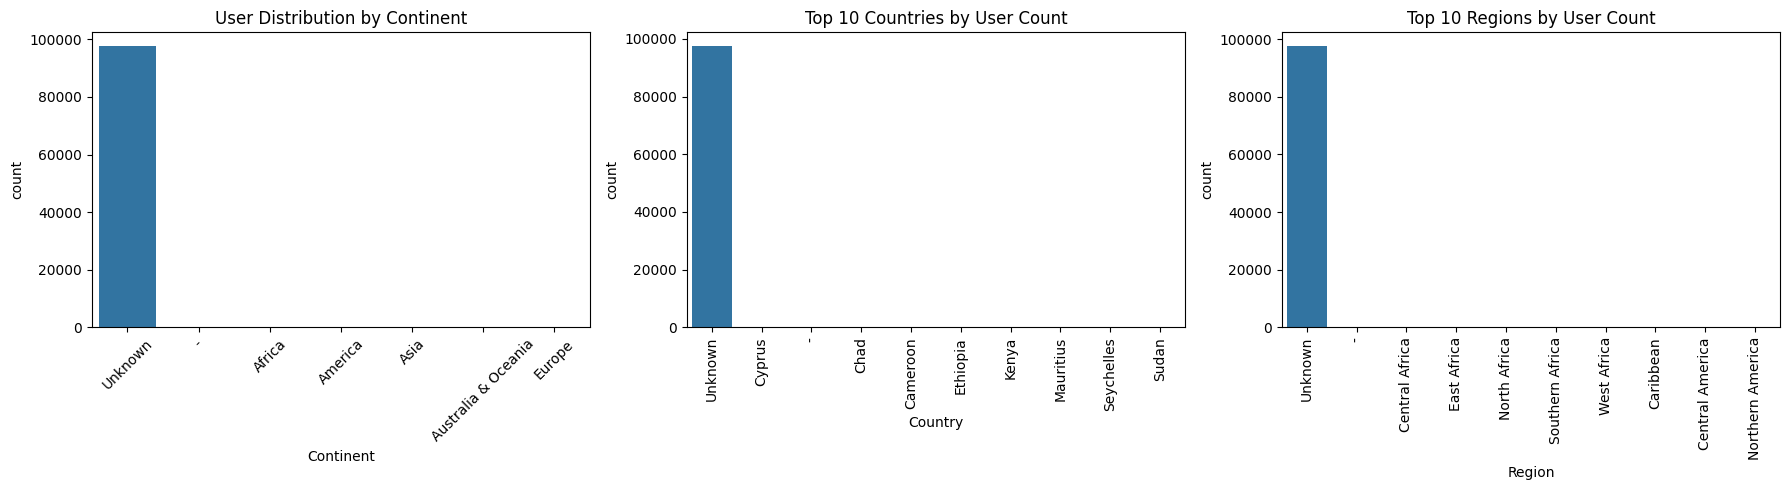

In [82]:
# 1. User Distribution across Continent, Country, Region
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=combined_df, x='Continent', ax=axs[0], order=combined_df['Continent'].value_counts().index)
axs[0].set_title('User Distribution by Continent')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(data=combined_df, x='Country', ax=axs[1], order=combined_df['Country'].value_counts().index[:10])
axs[1].set_title('Top 10 Countries by User Count')
axs[1].tick_params(axis='x', rotation=90)

sns.countplot(data=combined_df, x='Region', ax=axs[2], order=combined_df['Region'].value_counts().index[:10])
axs[2].set_title('Top 10 Regions by User Count')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

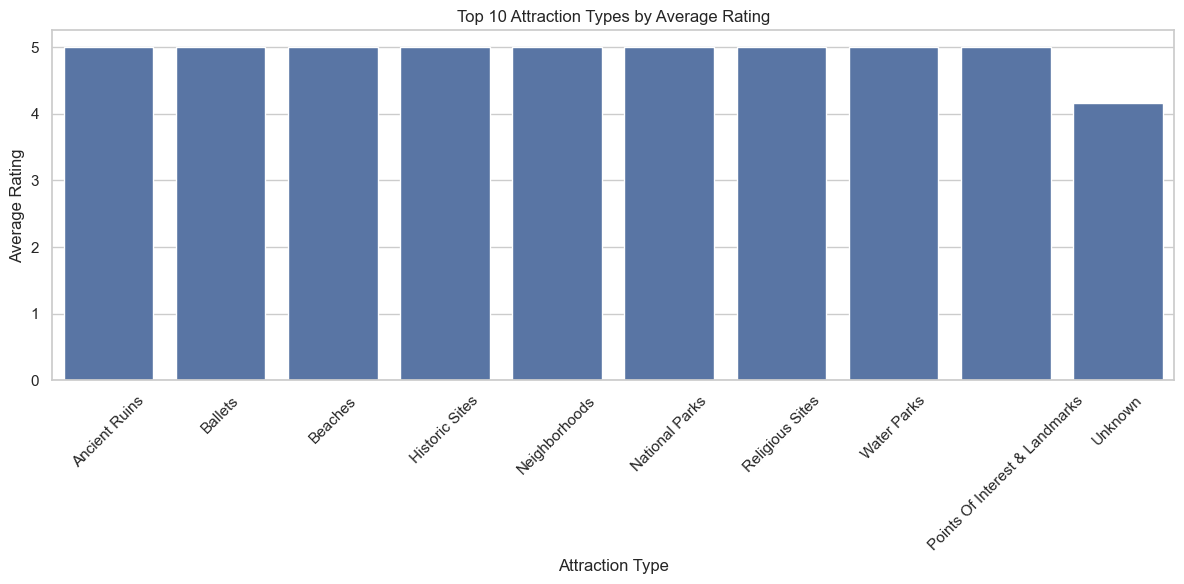

In [182]:
# 2. Explore attraction types and their popularity based on user ratings.
plt.figure(figsize=(12, 6))
attraction_rating = combined_df.groupby('AttractionType')['Rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=attraction_rating.index, y=attraction_rating.values)
plt.title('Top 10 Attraction Types by Average Rating')
plt.xlabel('Attraction Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


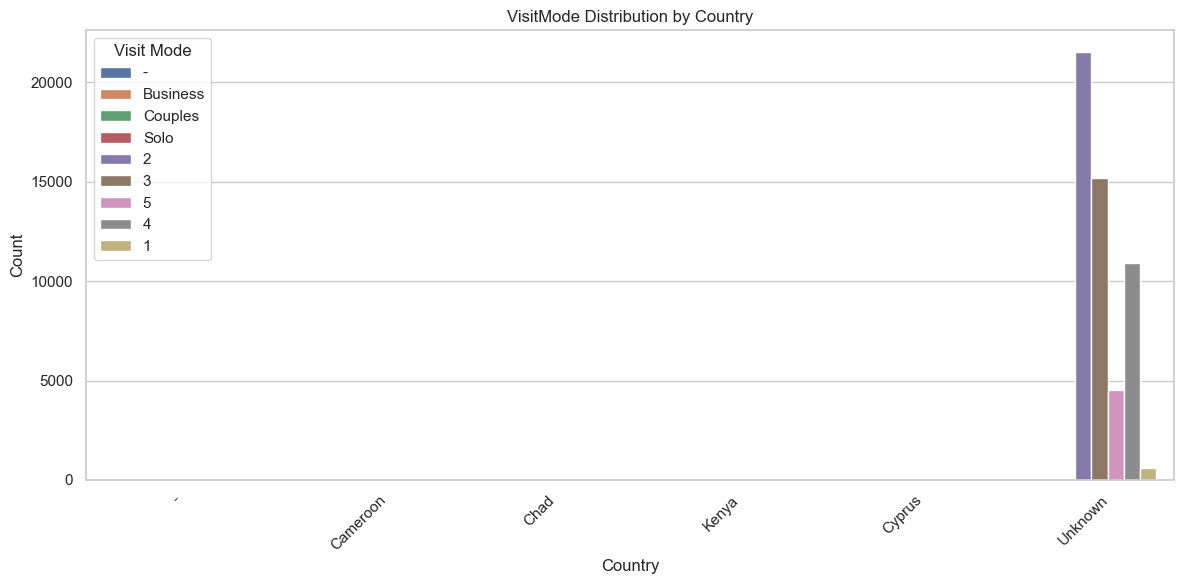

In [183]:
# Investigate correlation between VisitMode and user demographics to identify patterns.

plt.figure(figsize=(12, 6))
top_countries = combined_df['Country'].value_counts().nlargest(6).index
subset = combined_df[combined_df['Country'].isin(top_countries)]
sns.countplot(data=subset, x='Country', hue='VisitMode')
plt.title('VisitMode Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Visit Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

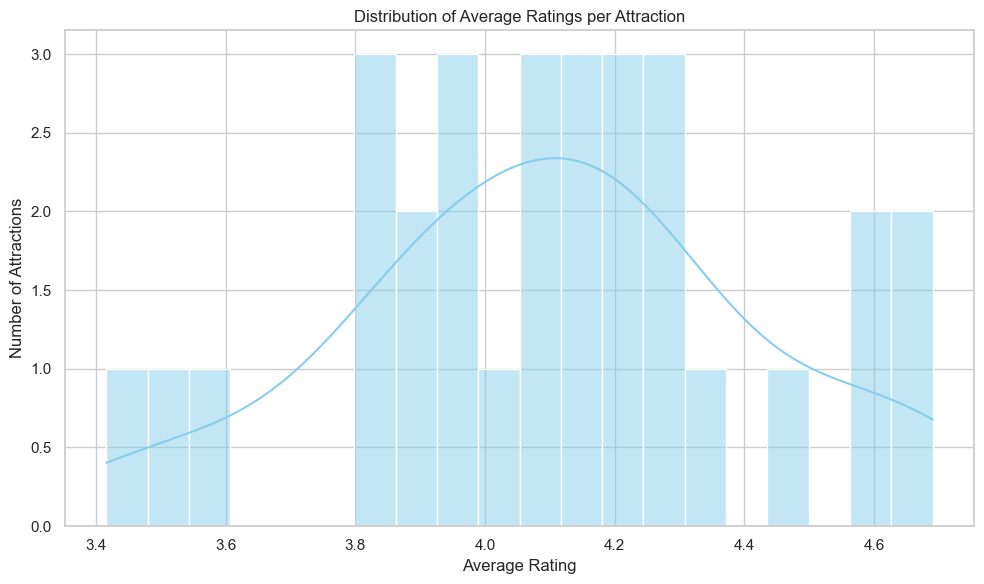

In [184]:
#Analyze distribution of ratings across different attractions and regions.
sns.set(style="whitegrid")


attraction_ratings = combined_df.groupby('Attraction').agg({
    'Rating': ['mean', 'count']
}).reset_index()
attraction_ratings.columns = ['Attraction', 'AvgRating', 'NumRatings']

attraction_ratings_filtered = attraction_ratings[attraction_ratings['NumRatings'] >= 20]

plt.figure(figsize=(10, 6))
sns.histplot(attraction_ratings_filtered['AvgRating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Ratings per Attraction')
plt.xlabel('Average Rating')
plt.ylabel('Number of Attractions')
plt.tight_layout()
plt.show()




C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\2827637697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_rated_df, x='Attraction', y='Rating', palette='Pastel1')


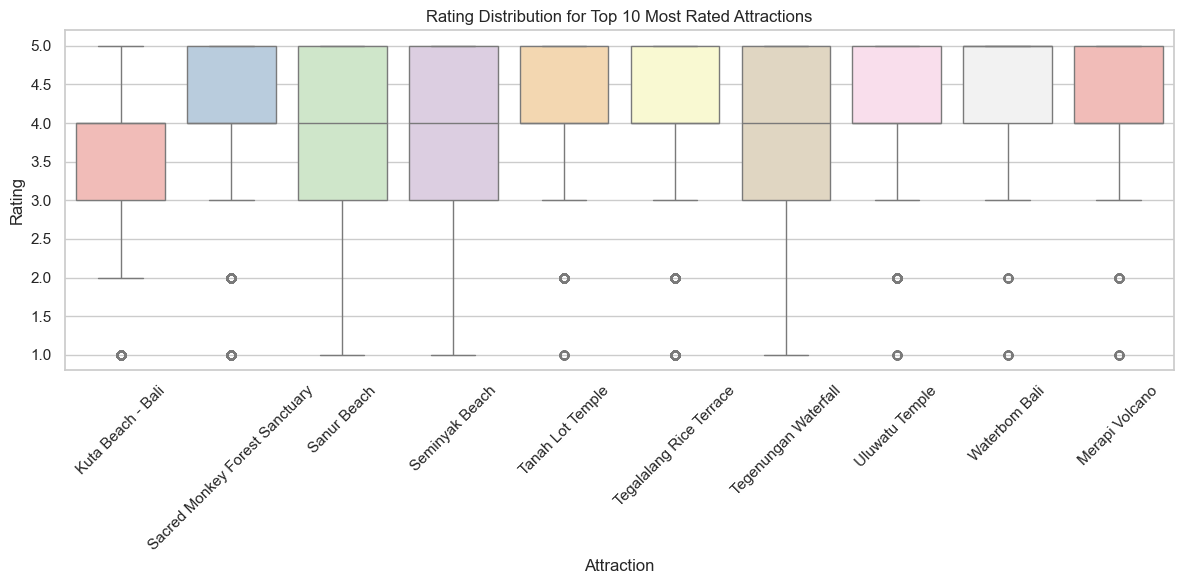

In [185]:
#  Boxplot of Ratings by Top 10 Attractions (most rated)
top_attractions = combined_df['Attraction'].value_counts().head(10).index
top_rated_df = combined_df[combined_df['Attraction'].isin(top_attractions)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_rated_df, x='Attraction', y='Rating', palette='Pastel1')
plt.title("Rating Distribution for Top 10 Most Rated Attractions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\2635246816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_region_df, x='Region', y='Rating', palette='Set2')


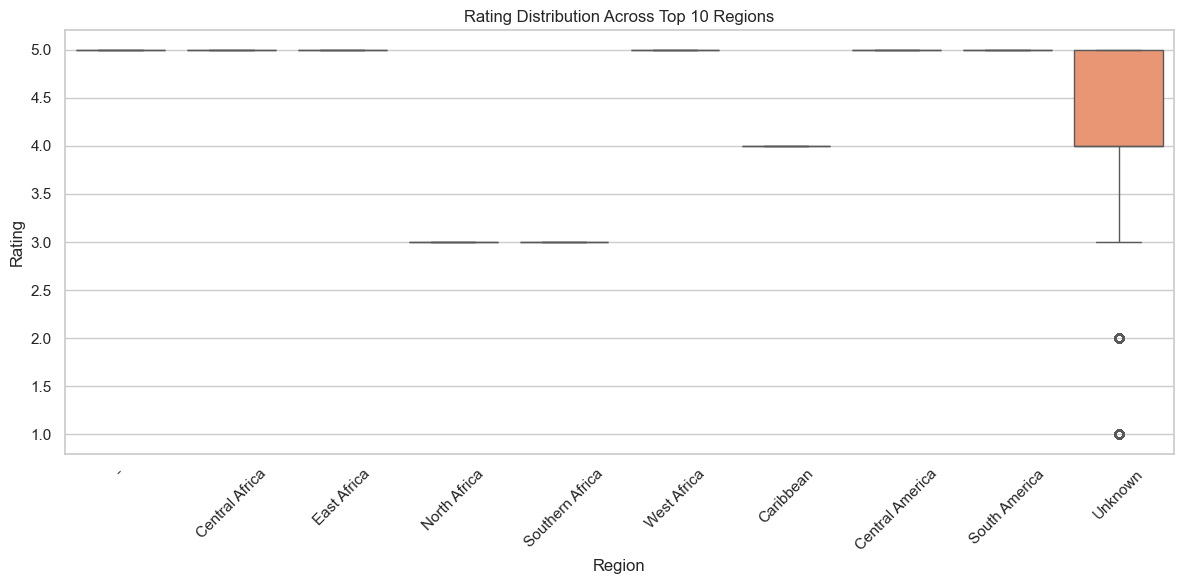

In [186]:
#  Boxplot of Ratings by Top 10 Regions
top_regions = combined_df['Region'].value_counts().head(10).index
top_region_df = combined_df[combined_df['Region'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_region_df, x='Region', y='Rating', palette='Set2')
plt.title("Rating Distribution Across Top 10 Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\582021081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_region_df, x='Region', y='Rating', palette='Set2')


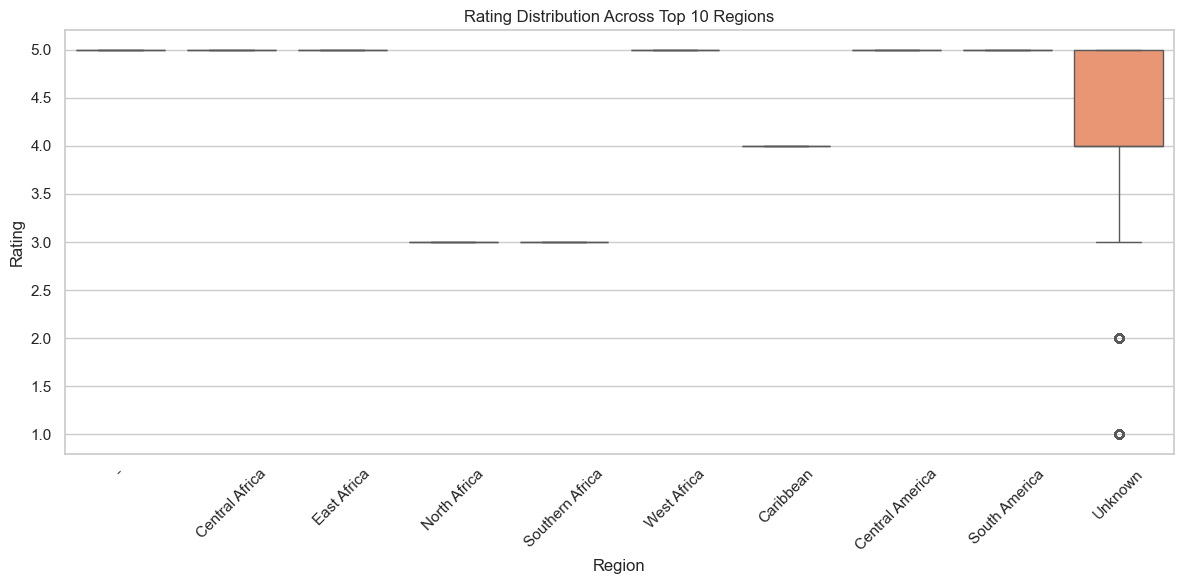

C:\Users\Ranjitha\AppData\Local\Temp\ipykernel_3824\582021081.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_region_df, x='Region', y='Rating', palette='coolwarm')


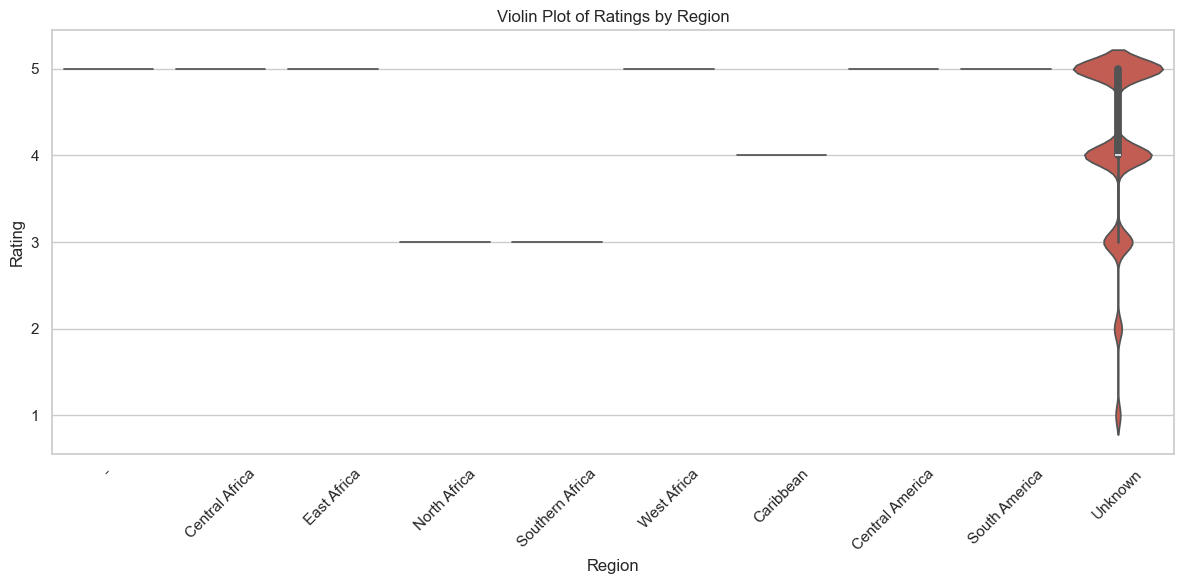

In [187]:
# Boxplot of Ratings by Top 10 Regions
top_regions = combined_df['Region'].value_counts().head(10).index
top_region_df = combined_df[combined_df['Region'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_region_df, x='Region', y='Rating', palette='Set2')
plt.title("Rating Distribution Across Top 10 Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Violin Plot (Optional - visualizing distribution shape by region)
plt.figure(figsize=(12, 6))
sns.violinplot(data=top_region_df, x='Region', y='Rating', palette='coolwarm')
plt.title("Violin Plot of Ratings by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [188]:
# MODEL TRAINING

In [189]:
#Regression Task:
df = combined_df.copy()

df = df.dropna(subset=['Rating'])

X = df[['Continent', 'Country', 'Region', 'VisitMode', 'VisitYear', 'VisitMonth', 'AttractionType']]
y = df['Rating']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Continent', 'Country', 'Region', 'VisitMode', 'AttractionType'])
], remainder='passthrough')  # Leave numerical columns (VisitYear, VisitMonth) as is

model = Pipeline([
    ('prep', preprocessor),
    ('reg', RandomForestRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.007370829106958743
MSE: 0.9348742268322292


In [191]:
# Classification Task:
df = combined_df.copy()

df = df.dropna(subset=['VisitMode'])

X = df[['Continent', 'Country', 'Region', 'VisitYear', 'VisitMonth', 'AttractionType', 'Rating']]
y = df['VisitMode']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Continent', 'Country', 'Region', 'AttractionType'])
], remainder='passthrough')  # keep numerical columns (VisitYear, VisitMonth, Rating)

clf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       198
           2       0.42      0.81      0.56      6472
           3       0.40      0.29      0.34      4598
           4       0.22      0.01      0.02      3244
           5       0.12      0.00      0.00      1365
    Business       0.00      0.00      0.00         1
     Friends       0.00      0.00      0.00         1

    accuracy                           0.42     15879
   macro avg       0.17      0.16      0.13     15879
weighted avg       0.34      0.42      0.33     15879



C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [ ]:
# REGRESSION TASK

In [ ]:
# Collaborative Filtering (User-Based)
user_item = combined_df.pivot_table(index='UserId', columns='Attraction', values='Rating')
user_item_filled = user_item.fillna(0)
user_item_sparse = csr_matrix(user_item_filled.values)

def user_based_recommender(user_id, top_n=5):
    if user_id not in user_item_filled.index:
        return f"User {user_id} not found."
    
    
    user_idx = user_item_filled.index.get_loc(user_id)
    
    user_vector = user_item_sparse[user_idx]
    user_sim = cosine_similarity(user_vector, user_item_sparse).flatten()

   
    similar_users_idx = user_sim.argsort()[::-1][1:]
    similar_users_weights = user_sim[similar_users_idx]

    similar_user_ids = user_item_filled.index[similar_users_idx]

    weighted_sum = user_item_filled.loc[similar_user_ids].T.dot(similar_users_weights)
    normalization = user_item_filled.loc[similar_user_ids].notna().T.dot(similar_users_weights)
    scores = weighted_sum / normalization
    scores = pd.Series(scores, index=user_item_filled.columns)

    rated = user_item.loc[user_id].dropna().index
    scores = scores.drop(index=rated, errors='ignore').sort_values(ascending=False).head(top_n)
    return scores.dropna()



In [193]:
recommendations = user_based_recommender(user_id=10234, top_n=5)
print(recommendations)


Attraction
Uluwatu Temple                        0.077749
Tegalalang Rice Terrace               0.063359
Tanah Lot Temple                      0.055348
Sacred Monkey Forest Sanctuary        0.054171
Bromo Tengger Semeru National Park    0.045978
dtype: float64


In [194]:
# Content-Based Filtering
combined_df['content'] = combined_df['AttractionType'].astype(str) + " " + \
                         combined_df['Region'].astype(str) + " " + \
                         combined_df['Country'].astype(str)


attraction_content = combined_df[['Attraction', 'content']].drop_duplicates(subset='Attraction')


tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(attraction_content['content'])


cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(attraction_content.index, index=attraction_content['Attraction'])

def content_based_recommender(attraction_name, top_n=5):
    if attraction_name not in indices:
        return f"Attraction '{attraction_name}' not found."
    idx = indices[attraction_name]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    attraction_indices = [i[0] for i in sim_scores]
    return attraction_content.iloc[attraction_indices]['Attraction']


In [195]:
content_based_recommender("Louvre Museum")


"Attraction 'Louvre Museum' not found."

In [196]:
# (Optional) Hybrid Recommender
def hybrid_recommender(user_id, attraction_name, top_n=5):
    user_recs = user_based_recommender(user_id, top_n * 2)
    content_recs = content_based_recommender(attraction_name, top_n * 2)

    hybrid_scores = pd.Series(dtype='float64')
    if isinstance(user_recs, pd.Series):
        hybrid_scores = user_recs.copy()
        for attraction in content_recs:
            if attraction in hybrid_scores:
                hybrid_scores[attraction] += 0.5
            else:
                hybrid_scores[attraction] = 0.5
        return hybrid_scores.sort_values(ascending=False).head(top_n)
    return content_recs.head(top_n)


In [197]:
hybrid_recommender(user_id=10234, attraction_name="Louvre Museum")


Attraction
t    2.0
o    2.0
     2.0
u    2.0
n    1.5
dtype: float64

In [98]:
# EVALUATION

In [198]:
# Evaluate classification model performance using accuracy, precision, recall, and F1-score.
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1-score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nFull classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.417406637697588
Precision (macro): 0.16641068867624245
Recall (macro): 0.15936625689624648
F1-score (macro): 0.13120721507742367


C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri


Full classification report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       198
           2       0.42      0.81      0.56      6472
           3       0.40      0.29      0.34      4598
           4       0.22      0.01      0.02      3244
           5       0.12      0.00      0.00      1365
    Business       0.00      0.00      0.00         1
     Friends       0.00      0.00      0.00         1

    accuracy                           0.42     15879
   macro avg       0.17      0.16      0.13     15879
weighted avg       0.34      0.42      0.33     15879



C:\Users\Ranjitha\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [190]:
# Evaluate regression model using R2, MSE, etc.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.007370829106958743
MSE: 0.9348742268322292
RMSE: 0.966888942346653
MAE: 0.7532997434040956


In [209]:
#FOR STREAMLIT USE PURPOSE

In [199]:
# FILE PATH
combined_df.to_csv(r"C:\Users\Ranjitha\OneDrive\Documents\Tourism_Project.csv", index=False)

In [200]:
combined_df

,Continent,AttractionCityId,VisitModeId,Region,TransactionId,VisitMonth,Country,CityName,Rating,VisitYear,...,CountryId,ContinentId,RegionId,AttractionId,AttractionTypeId,Attraction,AttractionAddress,UserId,VisitMode,content
0,-,1,0,-,3,10,-,-,5,2022,...,0,0,0,369,13,Kuta Beach - Bali,Kuta,70456,-,Ancient Ruins - -
1,Africa,1,1,Central Africa,8,10,Cameroon,Douala,5,2022,...,1,1,1,481,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia",7567,Business,Ballets Central Africa Cameroon
2,America,1,2,East Africa,9,10,Chad,South Region,5,2022,...,1,2,1,640,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia",79069,Couples,Beaches East Africa Chad
3,Asia,1,3,North Africa,10,10,Rwanda,N'Djamena,3,2022,...,2,3,1,650,13,Sanur Beach,Sanur,31019,Family,Caverns & Caves North Africa Rwanda
4,Australia & Oceania,1,4,Southern Africa,15,10,Ethiopia,Kigali,3,2022,...,3,4,2,673,13,Seminyak Beach,Seminyak,43611,Friends,Flea & Street Markets Southern Africa Ethiopia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52925,Unknown,-1,-1,Unknown,211227,9,Unknown,Unknown,4,2018,...,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,87100,2,Unknown Unknown Unknown
52926,Unknown,-1,-1,Unknown,211238,2,Unknown,Unknown,5,2016,...,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2,Unknown Unknown Unknown
52927,Unknown,-1,-1,Unknown,211239,2,Unknown,Unknown,4,2016,...,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2,Unknown Unknown Unknown
52928,Unknown,-1,-1,Unknown,211240,2,Unknown,Unknown,4,2016,...,-1,-1,-1,1297,-1,Yogyakarta Palace,Yogyakarta,88112,2,Unknown Unknown Unknown


In [201]:
combined_df.columns

Index(['Continent', 'AttractionCityId', 'VisitModeId', 'Region',
       'TransactionId', 'VisitMonth', 'Country', 'CityName', 'Rating',
       'VisitYear', 'AttractionType', 'CityId', 'CountryId', 'ContinentId',
       'RegionId', 'AttractionId', 'AttractionTypeId', 'Attraction',
       'AttractionAddress', 'UserId', 'VisitMode', 'content'],
      dtype='object')

In [204]:
combined_df["Continent"].unique

<bound method Series.unique of 0                          -
1                     Africa
2                    America
3                       Asia
4        Australia & Oceania
                ...         
52925                Unknown
52926                Unknown
52927                Unknown
52928                Unknown
52929                Unknown
Name: Continent, Length: 52930, dtype: object>

In [205]:
combined_df["Country"].unique

<bound method Series.unique of 0               -
1        Cameroon
2            Chad
3          Rwanda
4        Ethiopia
           ...   
52925     Unknown
52926     Unknown
52927     Unknown
52928     Unknown
52929     Unknown
Name: Country, Length: 52930, dtype: object>

In [207]:
combined_df["CityName"].unique

<bound method Series.unique of 0                   -
1              Douala
2        South Region
3           N'Djamena
4              Kigali
             ...     
52925         Unknown
52926         Unknown
52927         Unknown
52928         Unknown
52929         Unknown
Name: CityName, Length: 52930, dtype: object>

In [208]:
combined_df["Region"].unique

<bound method Series.unique of 0                      -
1         Central Africa
2            East Africa
3           North Africa
4        Southern Africa
              ...       
52925            Unknown
52926            Unknown
52927            Unknown
52928            Unknown
52929            Unknown
Name: Region, Length: 52930, dtype: object>